# Training Script 
This notebook uses the different algorithms for training

In [1]:
from numba import cuda 
device = cuda.get_current_device()
device.reset()

2024-06-18 01:59:37.998725: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-18 01:59:38.022245: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-18 01:59:39.162531: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-18 01:59:39.165881: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bu

(256, 256, 4) (512, 512, 1)
(256, 256, 4) (512, 512, 1)
(256, 256, 4) (512, 512, 1)
(256, 256, 4) (512, 512, 1)
(256, 256, 4) (512, 512, 1)
(256, 256, 4) (512, 512, 1)
(256, 256, 4) (512, 512, 1)
(256, 256, 4) (512, 512, 1)


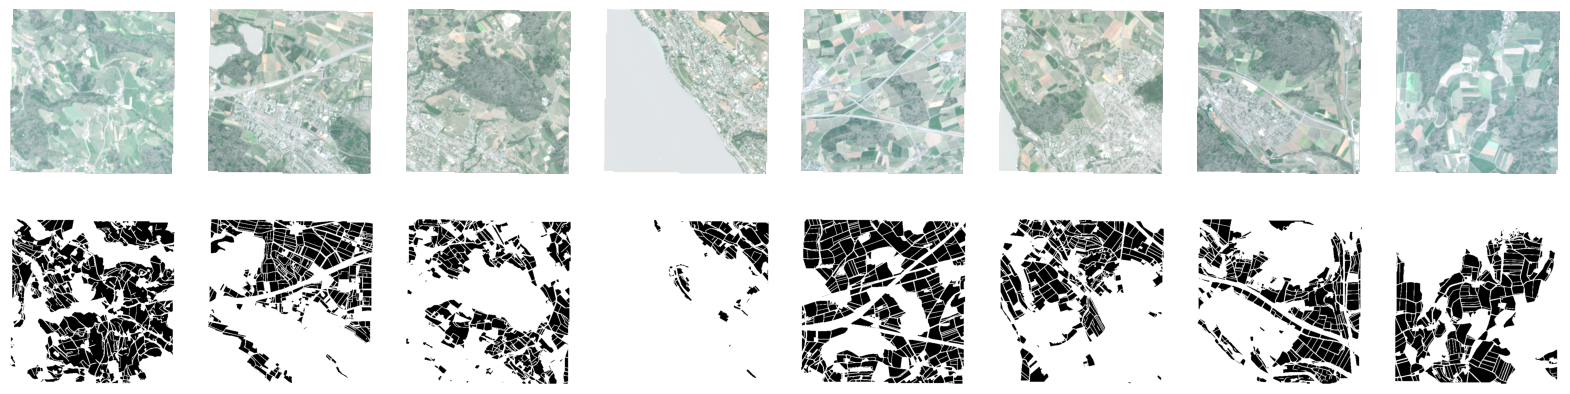

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

def plot_images(images, masks, num_images=8):
    fig, ax = plt.subplots(2, num_images, figsize=(20, 5))
    for i in range(num_images):
        ax[0, i].imshow(images[i])
        ax[0, i].axis('off')
        ax[1, i].imshow(masks[i].squeeze(), cmap='gray')
        ax[1, i].axis('off')
    plt.show()
    
path = "/workspaces/Satelite/data/dataset_upscaled_False/train"
train_data = tf.data.Dataset.load(path)

# Load the images and masks
images = []
masks = []

for image, mask in train_data.take(8):
    print(image.shape, mask.shape)
    images.append(image.numpy())
    masks.append(mask.numpy())

# Plot the images and masks
plot_images(images, masks, num_images=8)

In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import BinaryCrossentropy
from helpers.load import LoadandAugment
from models import model

input_shape = (256,256,4)
UNET = model.DeepUnet(input_shape, NUM_CLASSES=1, dropout_rate=0, batch_norm=True)

# Base path for the dataset
path = "/workspaces/Satelite/data/dataset_upscaled_False"
train_path = os.path.join(path, "train")
val_path = os.path.join(path, "val")
test_path = os.path.join(path, "test")

# Initialize data loaders with correct target shape
train_data = LoadandAugment(train_path, "train", 16, False)
val_data = LoadandAugment(val_path, "val", 16, False)

# Initialize UNET model with correct input shape
UNET.compile(optimizer='adam', loss=BinaryCrossentropy(), metrics=['accuracy'])

# Setup the model checkpoint callback to save the best model
checkpoint_callback = ModelCheckpoint(
    'best_model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min'
)

# Train the model
UNET.fit(
    train_data.dataset, 
    validation_data=val_data.dataset, 
    epochs=100, 
    callbacks=[checkpoint_callback]
)

Model: "AttentionResUNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 4  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  2368        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                  

2024-06-18 02:00:09.200793: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2024-06-18 02:00:12.746847: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f0e6594c390 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-18 02:00:12.746883: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-06-18 02:00:12.750235: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-18 02:00:12.832254: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2024-06-18 02:00:14.116969: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.52GiB with freed_by_count=0. The call

20/20 [==============================] - ETA: 0s - loss: 0.5888 - accuracy: 0.7023
Epoch 1: val_loss improved from inf to 22101.51562, saving model to best_model.h5
20/20 [==============================] - 78s 2s/step - loss: 0.5888 - accuracy: 0.7023 - val_loss: 22101.5156 - val_accuracy: 0.6984
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 0.5382 - accuracy: 0.7561
Epoch 2: val_loss improved from 22101.51562 to 285.83765, saving model to best_model.h5
20/20 [==============================] - 29s 1s/step - loss: 0.5382 - accuracy: 0.7561 - val_loss: 285.8376 - val_accuracy: 0.3255
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 0.5167 - accuracy: 0.7793
Epoch 3: val_loss improved from 285.83765 to 2.15143, saving model to best_model.h5
20/20 [==============================] - 29s 1s/step - loss: 0.5167 - accuracy: 0.7793 - val_loss: 2.1514 - val_accuracy: 0.3867
Epoch 4/100
20/20 [==============================] - ETA: 0s - loss: 0.5066 - ac

KeyboardInterrupt: 

1/1 [==============================] - 0s 22ms/step
Min prediction value: 0.0
Max prediction value: 1.0


IndexError: index 5 is out of bounds for axis 0 with size 5

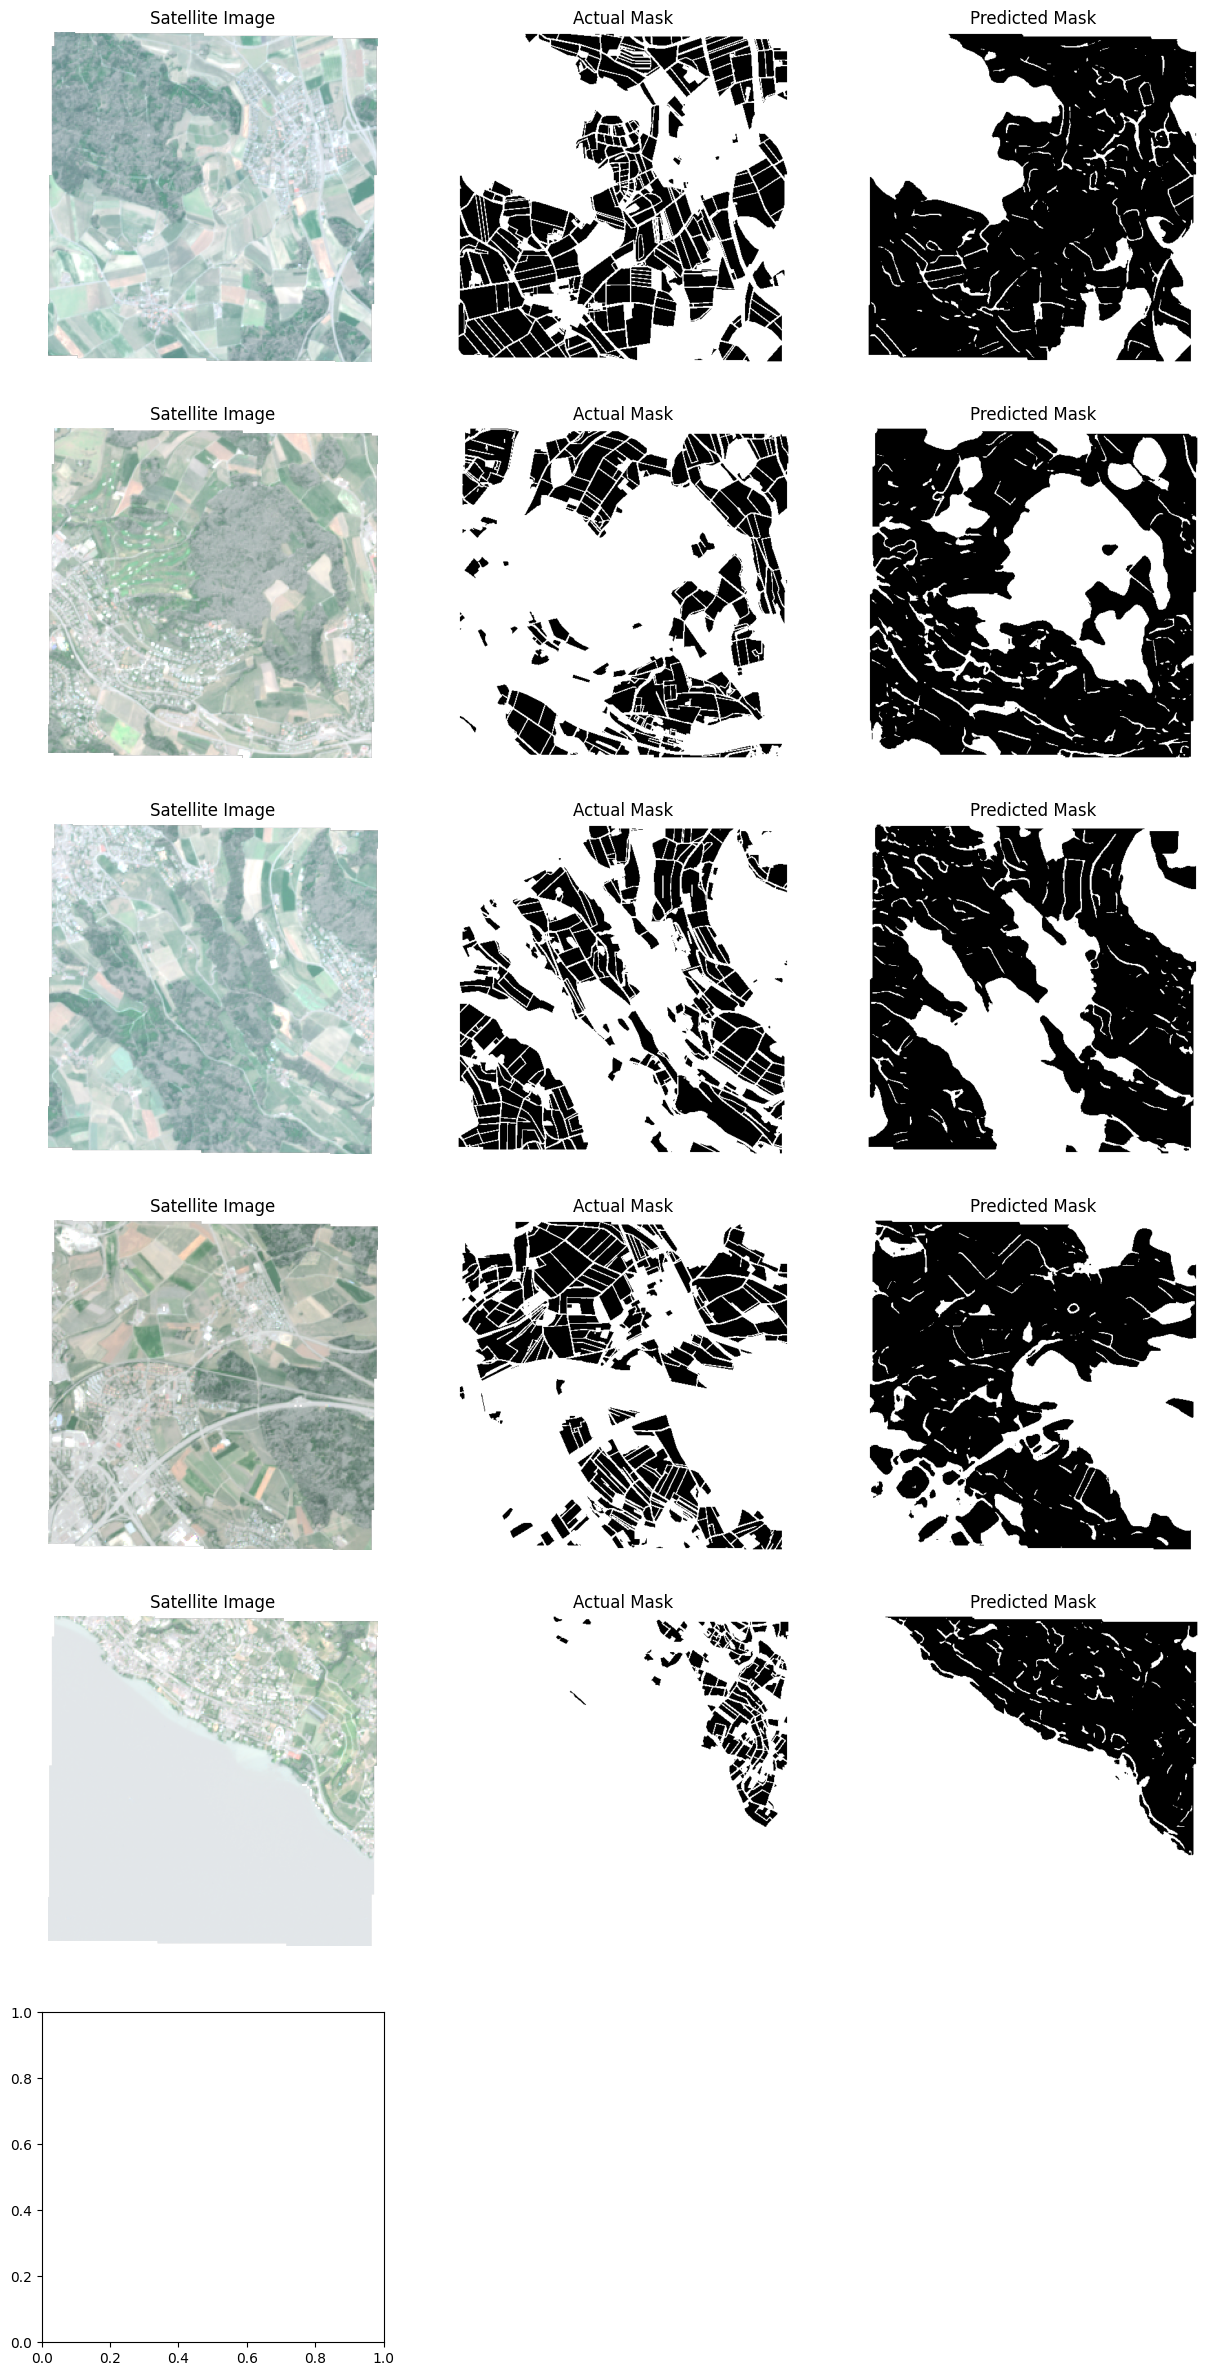

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import tensorflow as tf
import rasterio
from rasterio.transform import from_origin
from helpers.load import LoadandAugment

# Base path for the dataset
path = "/workspaces/Satelite/data/dataset_upscaled_False"
test_path = os.path.join(path, "test")

#  Load the test file mapping
with open('/workspaces/Satelite/data/dataset_upscaled_False/test_file_mapping.json', 'r') as f:
    test_file_mapping = json.load(f)

def plot_predictions(images, masks, predictions, num=6):
    plt.figure(figsize=(15, 5*num))
    
    for i in range(num):
        plt.subplot(num, 3, i*3+1)
        plt.imshow(images[i])
        plt.title("Satellite Image")
        plt.axis('off')
        
        plt.subplot(num, 3, i*3+2)
        plt.imshow(masks[i], cmap='gray')
        plt.title("Actual Mask")
        plt.axis('off')

        plt.subplot(num, 3, i*3+3)
        plt.imshow(predictions[i].squeeze(), cmap='gray')
        plt.title("Predicted Mask")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Load model and weights
UNET.load_weights('best_model.h5')
test_data_loader = LoadandAugment(test_path, "test", 5, True)

# Get the test dataset
test_dataset = test_data_loader.dataset

# Predict on the test data
for images, masks in test_dataset.take(1):
    predictions = UNET.predict(images)
    predictions = (predictions > 0.5).astype(np.float32) 

# Check predictions
print("Min prediction value:", predictions.min())
print("Max prediction value:", predictions.max())

# Save predictions as .tif files
for idx, prediction in enumerate(predictions):
    # Get the original mask path
    original_mask_path = test_file_mapping[idx]["mask"]
    
    # Read the original mask to get the metadata
    with rasterio.open(original_mask_path) as src:
        metadata = src.meta.copy()
        metadata.update({
            "count": 1,
            "dtype": 'float32'
        })
        
        # Save the predicted mask with the same metadata
        predicted_mask_path = original_mask_path.replace('mask', 'predicted_mask')
        with rasterio.open(predicted_mask_path, 'w', **metadata) as dst:
            dst.write(prediction.squeeze(), 1)

# Plot the predictions
plot_predictions(images.numpy(), masks.numpy(), predictions)


In [5]:
import os
import numpy as np
import geopandas as gpd
from skimage import io
from skimage.measure import find_contours
from shapely.geometry import Polygon
from rdp import rdp
import matplotlib.pyplot as plt

# Define the paths
predicted_mask_folder = '/workspaces/Satelite/data/predicted_mask'
original_mask_path = "/workspaces/Satelite/data/mask"

# Get the list of predicted and original mask filenames
predicted_mask_files = [file for file in os.listdir(predicted_mask_folder) if file.endswith('.tif')]
original_mask_files = [file for file in os.listdir(original_mask_path) if file.endswith('.tif')]

# Find the common filenames
common_files = set(predicted_mask_files).intersection(set(original_mask_files))

# Sort the common filenames
common_files = sorted(common_files)

# Read the masks in sorted order
predicted_masks = [io.imread(os.path.join(predicted_mask_folder, file)) for file in common_files]
original_masks = [io.imread(os.path.join(original_mask_path, file)) for file in common_files]

def extract_polygons(mask):
    # Rotate the mask if needed (assuming 90 degrees clockwise rotation)
    mask = np.rot90(mask, k=-1)
    
    # Find contours in the mask
    contours = find_contours(mask, level=0.5)
    
    # Create an empty list to store the polygons
    polygons = []
    
    # Iterate over each contour
    for contour in contours:
        # Simplify the contour using Ramer-Douglas-Peucker algorithm
        simplified_contour = rdp(contour, epsilon=1.0)
        
        # Check if the simplified contour has at least 4 coordinates
        if len(simplified_contour) >= 4:
            # Create a Polygon object from the simplified contour
            polygon = Polygon(simplified_contour)
            
            # Append the polygon to the list
            polygons.append(polygon)
    
    return polygons

def create_geodataframe(polygons, crs='EPSG:32632'):
    # Create a GeoDataFrame from the list of polygons
    gdf = gpd.GeoDataFrame(geometry=polygons)
    
    # Set the CRS of the GeoDataFrame
    gdf.set_crs(crs, inplace=True)
    
    return gdf

def save_geodataframe(gdf, filename):
    # Save the GeoDataFrame to a file (e.g., GeoPackage)
    gdf.to_file(filename, driver="GPKG")

# Extract polygons for original and predicted masks
original_polygons = [extract_polygons(mask) for mask in original_masks]
predicted_polygons = [extract_polygons(mask) for mask in predicted_masks]

# Create GeoDataFrames for original and predicted masks
original_gdfs = [create_geodataframe(polygons) for polygons in original_polygons]
predicted_gdfs = [create_geodataframe(polygons) for polygons in predicted_polygons]

# Save the GeoDataFrames to files
for i, filename in enumerate(common_files):
    original_filename = f"original_{filename.split('.')[0]}.gpkg"
    predicted_filename = f"predicted_{filename.split('.')[0]}.gpkg"
    
    save_geodataframe(original_gdfs[i], original_filename)
    save_geodataframe(predicted_gdfs[i], predicted_filename)

print("GeoDataFrames saved successfully.")


GeoDataFrames saved successfully.


In [ ]:

# Rotate the mask if needed (assuming 90 degrees clockwise rotation)
mask = np.rot90(mask, k=-1)

# Find contours in the mask
contours = find_contours(mask, level=0.5)

# Create an empty list to store the polygons
polygons = []

# Iterate over each contour
for contour in contours:
    # Simplify the contour using Ramer-Douglas-Peucker algorithm
    simplified_contour = rdp(contour, epsilon=1.0)
    
    # Check if the simplified contour has at least 4 coordinates
    if len(simplified_contour) >= 4:
        # Create a Polygon object from the simplified contour
        polygon = Polygon(simplified_contour)
        
        # Append the polygon to the list
        polygons.append(polygon)

# Create a GeoDataFrame from the list of polygons
gdf = gpd.GeoDataFrame(geometry=polygons)

# Set the CRS of the GeoDataFrame (replace 'EPSG:4326' with the appropriate CRS)
# EPSG:32632 - WGS 84 / UTM zone 32N

# Save the GeoDataFrame to a file (e.g., geodataframe gpkg)
gdf.to_file("polygons.gpkg", driver="GPKG")